In [82]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7722256a58>]], dtype=object)

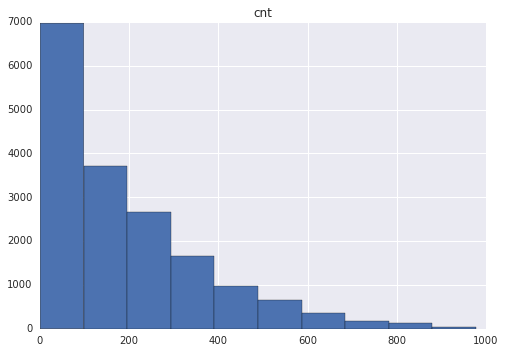

In [17]:
bike_rentals.hist(column="cnt")

In [10]:
bike_rentals.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [15]:
def assign_label(h):
    if 0 <= h < 6:
        return 4
    elif 6 <= h < 12:
        return 1
    elif 12 <= h < 18:
        return 2
    elif 18 <= h <= 24:
        return 3
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals[['hr', 'time_label']].head()

,hr,time_label
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4


In [20]:
train = bike_rentals.sample(frac=0.8, random_state=42)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [44]:
cols_exclude = ['cnt', 'casual', 'dteday', 'registered', 'instant', 'hr']
cols = [x for x in bike_rentals.columns.tolist() if x not in cols_exclude]
cols

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [42]:
model = LinearRegression()
model.fit(train[cols], train['cnt'])
preds = model.predict(test[cols])
mae = mean_absolute_error(test['cnt'], preds)

print("mae:", mae, "average cnt:", bike_rentals['cnt'].mean())

mae: 104.433934179 average cnt: 189.463087635


In [81]:
model = DecisionTreeRegressor(max_depth=11, min_samples_leaf=12)

model.fit(train[cols], train['cnt'])
preds = model.predict(test[cols])
mae = mean_absolute_error(test['cnt'], preds)
mae

77.376752306378108

In [110]:
model = RandomForestRegressor(max_depth=1, min_samples_leaf=3, random_state=42)
model.fit(train[cols], train['cnt'])
preds = model.predict(test[cols])
mae = mean_absolute_error(test['cnt'], preds)
mae

74.760490876720866